**Import packages**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

**Load and Split data**

In [ ]:
# Load data
data= 'labelled_dysx.csv'
data = pd.read_csv(data)
y = data['Label']
X = data.drop(['Label'], axis=1)
columns = X.columns  # Get feature names

# Define test samples as DataFrames with proper feature names
test1 = pd.DataFrame([[0.5, 0.1, 0.2, 0.8, 0.3, 0.5]], columns=columns)
test2 = pd.DataFrame([[0.7, 0.9, 0.4, 0.9, 0.3, 0.8]], columns=columns)
test3 = pd.DataFrame([[0.1, 0.7, 0.2, 0.6, 0.9, 0.6]], columns=columns)
test4 = pd.DataFrame([[0.3, 0.4, 0.5, 0.3, 0.3, 0.5]], columns=columns)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=10)

# Initialize metrics
precision = [0, 0, 0, 0, 0]
recall = [0, 0, 0, 0, 0]
fscore = [0, 0, 0, 0, 0]
error = [0.0, 0.0, 0.0, 0.0, 0.0]

# Scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
test1 = sc.transform(test1)
test2 = sc.transform(test2)
test3 = sc.transform(test3)
test4 = sc.transform(test4)

# Initialize label lists
label_1 = [0, 0, 0, 0, 0]
label_2 = [0, 0, 0, 0, 0]
label_3 = [0, 0, 0, 0, 0]
label_4 = [0, 0, 0, 0, 0]

**Decision tree**

In [ ]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
error[0] = round(mean_absolute_error(y_test, pred_dt), 3)

ans_1 = dt.predict(test1)
ans_2 = dt.predict(test2)
ans_3 = dt.predict(test3)
ans_4 = dt.predict(test4)
label_1[0] = ans_1[0]
label_2[0] = ans_2[0]
label_3[0] = ans_3[0]
label_4[0] = ans_4[0]

**Random Forest**

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
error[1] = round(mean_absolute_error(y_test, pred_rf), 3)

ans_1 = rf.predict(test1)
ans_2 = rf.predict(test2)
ans_3 = rf.predict(test3)
ans_4 = rf.predict(test4)
label_1[1] = ans_1[0]
label_2[1] = ans_2[0]
label_3[1] = ans_3[0]  # Fixed typo here
label_4[1] = ans_4[0]

**SVM**

In [ ]:
# Support Vector Machine Classifier
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)
error[2] = round(mean_absolute_error(y_test, pred_svm), 3)

ans_1 = svm.predict(test1)
ans_2 = svm.predict(test2)
ans_3 = svm.predict(test3)
ans_4 = svm.predict(test4)
label_1[2] = ans_1[0]
label_2[2] = ans_2[0]
label_3[2] = ans_3[0]
label_4[2] = ans_4[0]

**Random Forest with GridSearchSV**

In [ ]:
# Random Forest with GridSearchCV
n_est = {'n_estimators': [10, 100, 500, 1000]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=0), n_est, scoring='f1_macro')
rf_grid.fit(X_train, y_train)
pred_rf_grid = rf_grid.predict(X_test)
print('Best value of n_estimators for RandomForest model is:')
print(rf_grid.best_params_)
error[3] = round(mean_absolute_error(y_test, pred_rf_grid), 3)

ans_1 = rf_grid.predict(test1)
ans_2 = rf_grid.predict(test2)
ans_3 = rf_grid.predict(test3)
ans_4 = rf_grid.predict(test4)
label_1[3] = ans_1[0]
label_2[3] = ans_2[0]
label_3[3] = ans_3[0]
label_4[3] = ans_4[0]

Best value of n_estimators for RandomForest model is:
{'n_estimators': 100}


**SVM with GridSearchCV**

In [ ]:
# SVM with GridSearchCV
options_parameters = [
    {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
     'C': [1, 10, 100, 1000]},
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
]
svm_grid = GridSearchCV(SVC(), options_parameters, scoring='f1_macro')
svm_grid.fit(X_train, y_train)
pred_svm_grid = svm_grid.predict(X_test)
print('Best parameters of SVM model are:')
print(svm_grid.best_params_)
error[4] = round(mean_absolute_error(y_test, pred_svm_grid), 3)

ans_1 = svm_grid.predict(test1)
ans_2 = svm_grid.predict(test2)
ans_3 = svm_grid.predict(test3)
ans_4 = svm_grid.predict(test4)
label_1[4] = ans_1[0]
label_2[4] = ans_2[0]
label_3[4] = ans_3[0]
label_4[4] = ans_4[0]

Best parameters of SVM model are:
{'C': 1, 'kernel': 'linear'}


**Check model errors**

Model		Error
DecisionTree	0.162
RandomForest	0.072
SVM	0.075
RandomForest
(GridSearch)	0.072
SVM
(GridSearch)	0.075
Labels for test1: [1, 0, 1, 0, 1]
Labels for test2: [1, 1, 2, 1, 2]
Labels for test3: [1, 0, 0, 0, 0]
Labels for test4: [1, 1, 1, 1, 1]


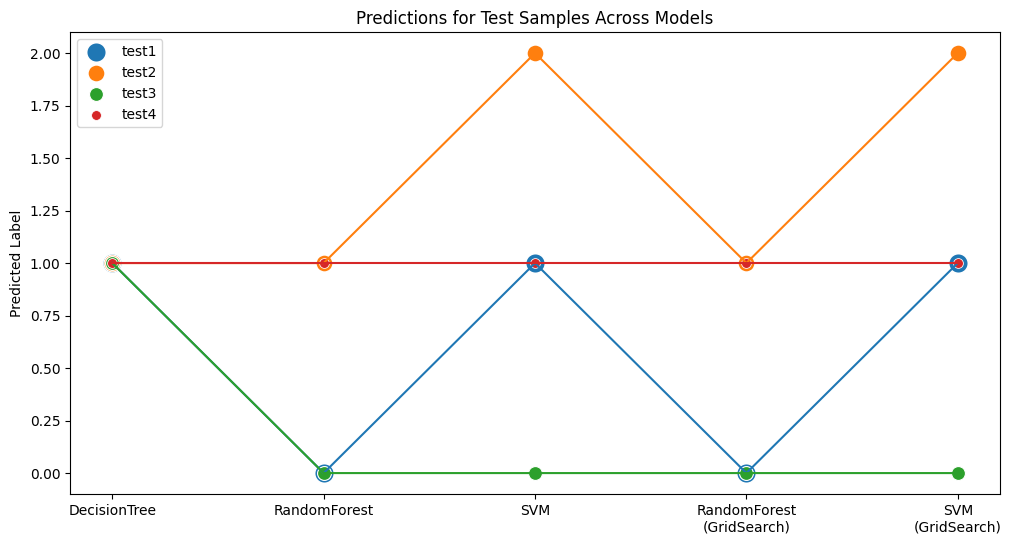

In [ ]:
# Print model errors
models = ['DecisionTree', 'RandomForest', 'SVM', 'RandomForest\n(GridSearch)', 'SVM\n(GridSearch)']
print('Model\t\tError')
for i in range(5):
    print('{}\t{}'.format(models[i], error[i]))

# Print labels
print('Labels for test1:', label_1)
print('Labels for test2:', label_2)
print('Labels for test3:', label_3)
print('Labels for test4:', label_4)

# Plotting predictions
plt.figure(figsize=(12, 6))
sns.scatterplot(x=models, y=label_1, s=200, label='test1')
sns.scatterplot(x=models, y=label_2, s=150, label='test2')
sns.scatterplot(x=models, y=label_3, s=100, label='test3')
sns.scatterplot(x=models, y=label_4, s=50, label='test4')
sns.lineplot(x=models, y=label_1)
sns.lineplot(x=models, y=label_2)
sns.lineplot(x=models, y=label_3)
sns.lineplot(x=models, y=label_4)
plt.ylabel('Predicted Label')
plt.title('Predictions for Test Samples Across Models')
plt.legend()
plt.show()

**`Decision confusion matrix`**

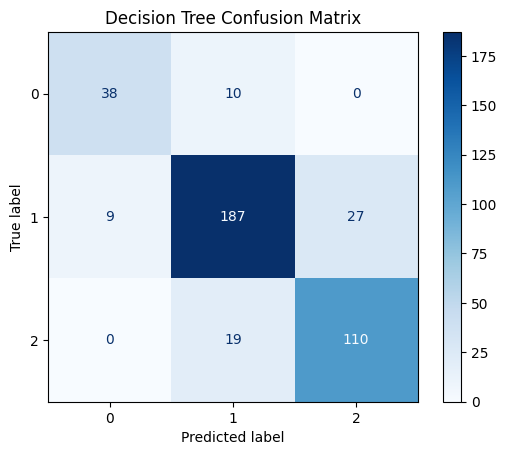

For a DecisionTreeClassifier: Precision = 0.826, Recall = 0.828, F1-score = 0.826


In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()

# Decision Tree Confusion Matrix
plot_confusion_matrix(y_test, pred_dt, 'Decision Tree Confusion Matrix')
precision[0], recall[0], fscore[0], _ = precision_recall_fscore_support(y_test, pred_dt, average='macro')
print('For a DecisionTreeClassifier: Precision = {:.3f}, Recall = {:.3f}, F1-score = {:.3f}'.format(
    precision[0], recall[0], fscore[0]))

**Random Forest Confusion Matrix**

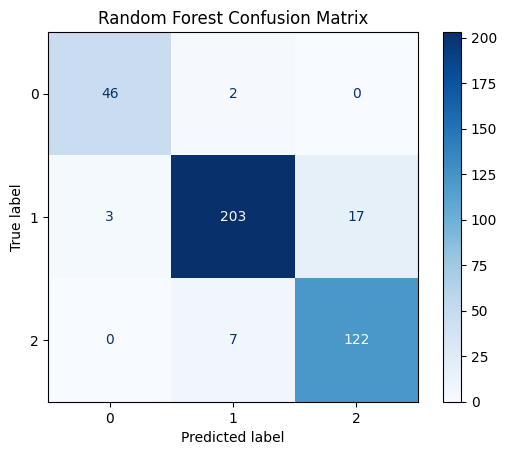

For a RandomForestClassifier: Precision = 0.925, Recall = 0.938, F1-score = 0.931


In [ ]:
# Random Forest Confusion Matrix
plot_confusion_matrix(y_test, pred_rf, 'Random Forest Confusion Matrix')
precision[1], recall[1], fscore[1], _ = precision_recall_fscore_support(y_test, pred_rf, average='macro')
print('For a RandomForestClassifier: Precision = {:.3f}, Recall = {:.3f}, F1-score = {:.3f}'.format(
    precision[1], recall[1], fscore[1]))

**SVM Confusion Matrix**

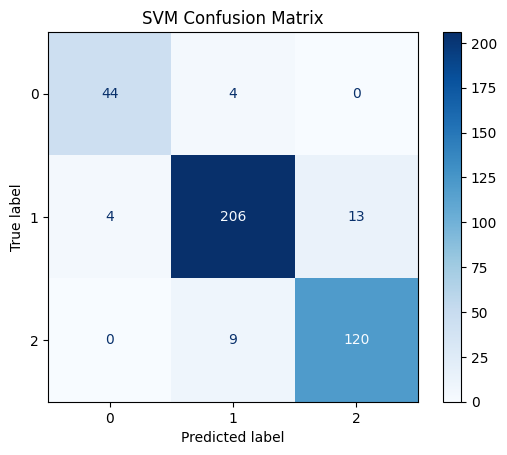

For an SVM model: Precision = 0.920, Recall = 0.924, F1-score = 0.922


In [ ]:

# SVM Confusion Matrix
plot_confusion_matrix(y_test, pred_svm, 'SVM Confusion Matrix')
precision[2], recall[2], fscore[2], _ = precision_recall_fscore_support(y_test, pred_svm, average='macro')
print('For an SVM model: Precision = {:.3f}, Recall = {:.3f}, F1-score = {:.3f}'.format(
    precision[2], recall[2], fscore[2]))

**Random Forest with GridSearchCV Confusion Matrix**

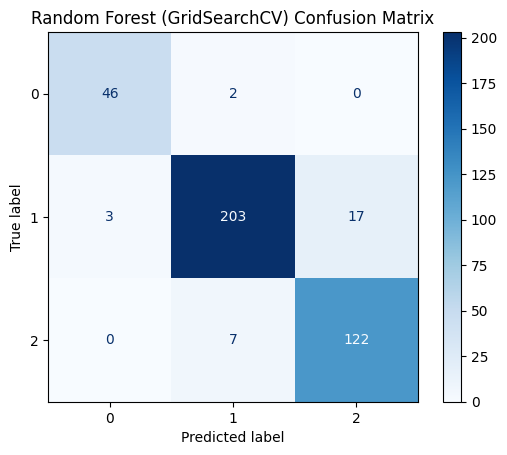

For a RandomForest (GridSearchCV): Precision = 0.925, Recall = 0.938, F1-score = 0.931


In [ ]:
# Random Forest with GridSearchCV Confusion Matrix
plot_confusion_matrix(y_test, pred_rf_grid, 'Random Forest (GridSearchCV) Confusion Matrix')
precision[3], recall[3], fscore[3], _ = precision_recall_fscore_support(y_test, pred_rf_grid, average='macro')
print('For a RandomForest (GridSearchCV): Precision = {:.3f}, Recall = {:.3f}, F1-score = {:.3f}'.format(
    precision[3], recall[3], fscore[3]))

**SVM with GridSearchSV Confusion Matrix**

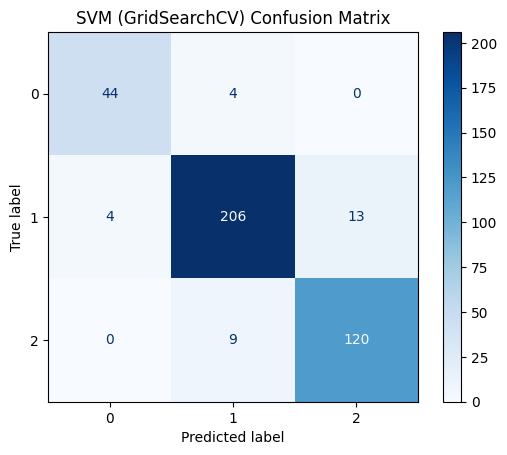

For an SVM (GridSearchCV): Precision = 0.920, Recall = 0.924, F1-score = 0.922


In [ ]:
# SVM with GridSearchCV Confusion Matrix
plot_confusion_matrix(y_test, pred_svm_grid, 'SVM (GridSearchCV) Confusion Matrix')
precision[4], recall[4], fscore[4], _ = precision_recall_fscore_support(y_test, pred_svm_grid, average='macro')
print('For an SVM (GridSearchCV): Precision = {:.3f}, Recall = {:.3f}, F1-score = {:.3f}'.format(
    precision[4], recall[4], fscore[4]))

**Model Performance**

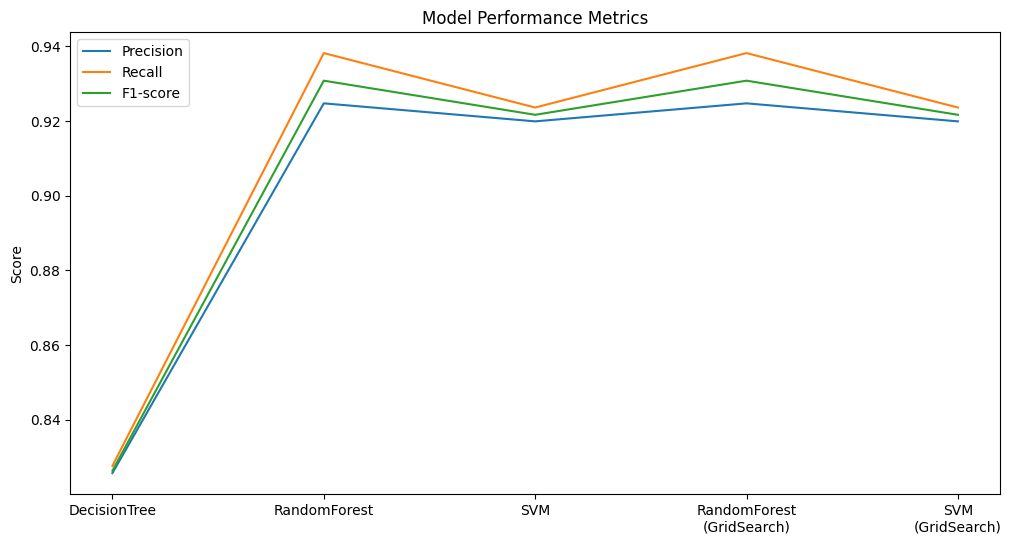

Applicant	Label	Possibility of Dyslexia
1		0		High
2		1		Moderate
3		0		High
4		1		Moderate


In [ ]:
# Plot precision, recall, and f1-score
plt.figure(figsize=(12, 6))
sns.lineplot(x=models, y=precision, label='Precision')
sns.lineplot(x=models, y=recall, label='Recall')
sns.lineplot(x=models, y=fscore, label='F1-score')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.legend()
plt.show()

# Mapping labels to possibilities
possibility = {0: "High", 1: "Moderate", 2: "Low"}
print('Applicant\tLabel\tPossibility of Dyslexia')
for i in range(4):
    label = label_1[3] if i == 0 else label_2[3] if i == 1 else label_3[3] if i == 2 else label_4[3]
    print('{}\t\t{}\t\t{}'.format(i+1, label, possibility.get(label, 'Unknown')))

**Based on above chart, choosing Random Forest with GridSearchCV**

In [ ]:
y = data.Label
X = data.drop(['Label'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=10)

sc = StandardScaler(copy=False)
sc.fit_transform(X_train)
print(sc.transform(X_test))

n_est = {'n_estimators': [10, 100, 500, 1000]}
model = GridSearchCV(RandomForestClassifier(random_state=0), n_est, scoring='accuracy')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print('Best value of n_estimator for RandomForest model is:')
print(model.best_params_)

[[-0.40859278  0.09423675  0.57481025  1.09456548  0.51247074  0.54374235]
 [ 2.0828266   0.54298319 -0.30276265  0.14688974  0.01971041  0.54374235]
 [ 0.0896911   0.09423675  0.1360238  -1.27462388 -0.47304992  0.1016754 ]
 ...
 [-0.90687665 -0.80325613 -0.7415491  -1.74846175 -1.45857058 -1.22452545]
 [-0.90687665  0.54298319 -0.30276265  0.14688974 -0.47304992  0.1016754 ]
 [ 0.58797497  0.09423675  0.57481025  2.04224123 -0.47304992  0.54374235]]
Best value of n_estimator for RandomForest model is:
{'n_estimators': 100}


**For user to work on the model**

In [ ]:

# Assuming 'model' is your trained RandomForestClassifier
# 'sc' is your trained StandardScaler
# 'columns' is the list of feature names used during training

# Get user inputs
name = input("Enter name of applicant: ")

print("\nThe scores of all the tests in quiz as well as survey need to be entered.")
print("All the values lie in the range 0 to 1.\n")

# Function to validate input scores
def get_score(prompt):
    while True:
        try:
            value = float(input(prompt))
            if 0.0 <= value <= 1.0:
                return value
            else:
                print("Please enter a value between 0 and 1.")
        except ValueError:
            print("Invalid input. Please enter a numerical value between 0 and 1.")

lang_vocab = get_score("Enter the score of Language Vocab test: ")
memory = get_score("Enter the score of Memory test: ")
speed = get_score("Enter the score of Speed test: ")
visual = get_score("Enter the score of Visual Discrimination test: ")
audio = get_score("Enter the score of Audio Discrimination test: ")
survey = get_score("Enter the score obtained from Survey: ")

def get_result(lang_vocab, memory, speed, visual, audio, survey):
    # Create a DataFrame with feature names
    data = pd.DataFrame([[lang_vocab, memory, speed, visual, audio, survey]], columns=columns)

    # Scale the data using the same scaler used during training
    data_scaled_array = sc.transform(data)

    # Convert the scaled array back to a DataFrame with feature names
    data_scaled = pd.DataFrame(data_scaled_array, columns=columns)

    # Predict using the model
    prediction = model.predict(data_scaled)

    # Extract the label
    label = int(prediction[0])

    # Interpret the label
    if label == 0:
        output = "There is a high chance of the applicant to have dyslexia."
    elif label == 1:
        output = "There is a moderate chance of the applicant to have dyslexia."
    else:
        output = "There is a low chance of the applicant to have dyslexia."
    return output


result = get_result(lang_vocab, memory, speed, visual, audio, survey)
print(result)


Enter name of applicant: 0.9

The scores of all the tests in quiz as well as survey need to be entered.
All the values lie in the range 0 to 1.

Enter the score of Language Vocab test: 0.9
Enter the score of Memory test: 0.9
Enter the score of Speed test: 0.9
Enter the score of Visual Discrimination test: 0.9
Enter the score of Audio Discrimination test: 0.9
Enter the score obtained from Survey: 0.9
There is a low chance of the applicant to have dyslexia.
